<a href="https://colab.research.google.com/github/YisusKraizz/Unidad3/blob/main/Unidad3/Practica5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 5: Simular La demanda diaria de productos tecnológicos

##Método de la transformada inversa:

Este método se utiliza para generar variables aleatorias de una distribución específica transformando números aleatorios uniformes (0,1) en variables con la distribución deseada.

##Distribución Binomial:

###Contexto:

Modelamos el número de clientes que realizan una compra en una tienda en línea en un día determinado. La tienda recibe, en promedio, 10 visitantes diarios, y la probabilidad de que un visitante compre es del 30%.

##Distribución Binomial:

Modela el número de éxitos (compras) en un número fijo de ensayos independientes (visitantes), cada uno con dos posibles resultados (compra o no compra) y una probabilidad constante de éxito.

𝑛
: Número de ensayos (visitantes diarios), en este caso,
𝑛
=
10
.

𝑝
: Probabilidad de éxito (compra), en este caso,
𝑝
=
0.30
.

La función de probabilidad de la distribución binomial se define como:

Pr
(
𝑋
=
𝑘
)
=
(
𝑛
𝑘
)
𝑝
𝑘
(
1
−
𝑝
)
𝑛
−
𝑘
donde
𝑘
 es el número de clientes que compran.

##Método de la Transformada Inversa:

Genera números aleatorios con una distribución específica, como la binomial, a partir de números aleatorios uniformes
𝑈
∼
(
0
,
1
)
.

Pasos:

##Generar un número aleatorio uniforme
𝑈
.

Calcular la función de distribución acumulada (FDA) de la distribución binomial sumando las probabilidades acumuladas para valores de
𝑘
=
0
,
1
,
2
,
.
.
.
.

Encontrar el valor más pequeño de
𝑘
 tal que
𝐹
(
𝑘
)
≥
𝑈
. Este valor de
𝑘
 es el número de clientes que compran en ese día.

Explicación de los resultados:

En cada simulación, se genera un número aleatorio uniforme
𝑈
 que se transforma mediante el método de la transformada inversa para obtener el número de clientes que compraron en ese día. La gráfica resultante de las 100 simulaciones refleja la probabilidad de distintas cantidades de compras, con un promedio cercano a
𝑛
𝑝
=
10
×
0.30
=
3
.

El método de la transformada inversa aplicado a la distribución binomial es útil para modelar situaciones con una probabilidad constante de éxito en eventos independientes, como las compras en una tienda en línea.

#Ejemplo aplicado en Python


Número de clientes que realizaron una compra en cada simulación (día):
[3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 3, 4, 4, 3, 7, 3, 2, 4, 3, 0, 0, 5, 2, 5, 2, 1, 3, 2, 2, 2, 3, 3, 3, 5, 6, 1, 2, 0, 2, 2, 0, 5, 6, 5, 2, 4, 3, 1, 4, 2, 1, 4, 2, 4, 7, 2, 4, 1, 1, 2, 5, 4, 5, 5, 2, 2, 2, 2, 3, 6, 4, 4, 0, 1, 2, 2, 4, 4, 2, 4, 3, 4, 5, 3, 4, 3, 2, 4, 5, 3, 3, 1, 1, 4, 4, 1, 4, 3, 2]


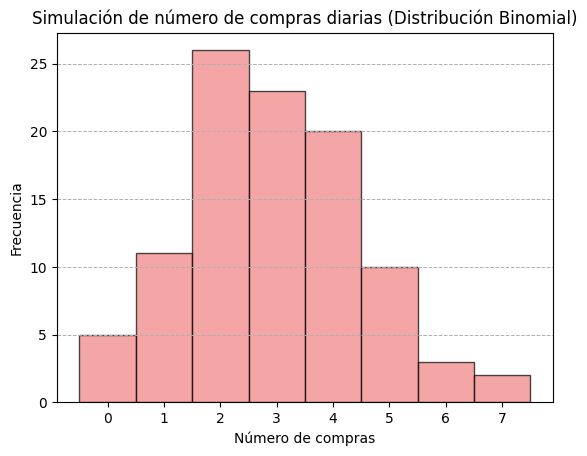

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 10  # Número de visitantes diarios
p = 0.30 # Probabilidad de que un visitante realice una compra

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (días)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de clientes que hicieron una compra
        k += 1

# Generar la cantidad de clientes que realizaron una compra en cada simulación (día)
compras_simuladas = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de clientes que realizaron una compra en cada simulación (día):")
print(compras_simuladas)

# Graficar los resultados
plt.hist(compras_simuladas, bins=np.arange(min(compras_simuladas), max(compras_simuladas) + 2) - 0.5, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title("Simulación de número de compras diarias (Distribución Binomial)")
plt.xlabel("Número de compras")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


#Conclusión

Este enfoque ayuda a prever y planificar el inventario de manera más efectiva, optimizando los recursos y mejorando la toma de decisiones en la gestión de la tienda. La simulación muestra cómo se distribuye la cantidad de compras diarias, permitiendo ajustes precisos en estrategias de marketing y gestión de inventarios. En definitiva, este método y el código proporcionan una herramienta valiosa para mejorar la eficiencia y rentabilidad de una tienda en línea.